In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from keras import datasets, models, layers

(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

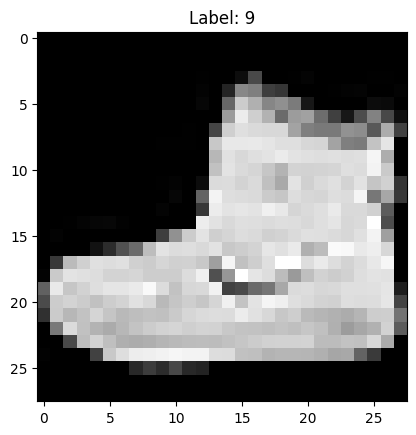

In [ ]:
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(train_images, train_labels,
                    epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stop],
                    verbose=2)


Epoch 1/50
1875/1875 - 13s - 7ms/step - accuracy: 0.8222 - loss: 0.4856 - val_accuracy: 0.8626 - val_loss: 0.3724
Epoch 2/50
1875/1875 - 8s - 4ms/step - accuracy: 0.8842 - loss: 0.3185 - val_accuracy: 0.8753 - val_loss: 0.3263
Epoch 3/50
1875/1875 - 6s - 3ms/step - accuracy: 0.8990 - loss: 0.2748 - val_accuracy: 0.8936 - val_loss: 0.2993
Epoch 4/50
1875/1875 - 11s - 6ms/step - accuracy: 0.9085 - loss: 0.2470 - val_accuracy: 0.8995 - val_loss: 0.2797
Epoch 5/50
1875/1875 - 6s - 3ms/step - accuracy: 0.9165 - loss: 0.2235 - val_accuracy: 0.9014 - val_loss: 0.2831
Epoch 6/50
1875/1875 - 11s - 6ms/step - accuracy: 0.9223 - loss: 0.2060 - val_accuracy: 0.8983 - val_loss: 0.2720
Epoch 7/50
1875/1875 - 10s - 5ms/step - accuracy: 0.9300 - loss: 0.1877 - val_accuracy: 0.9097 - val_loss: 0.2574
Epoch 8/50
1875/1875 - 6s - 3ms/step - accuracy: 0.9358 - loss: 0.1711 - val_accuracy: 0.9096 - val_loss: 0.2740
Epoch 9/50
1875/1875 - 8s - 4ms/step - accuracy: 0.9418 - loss: 0.1561 - val_accuracy: 0.902

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9092 - loss: 0.2637
Test accuracy: 0.9096999764442444


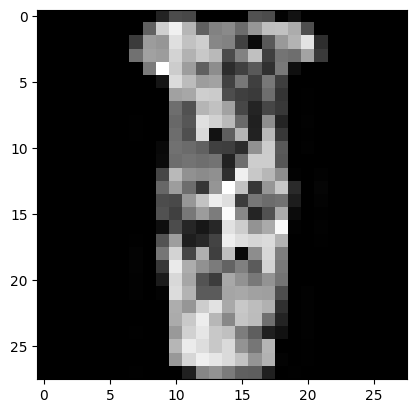

In [ ]:
plt.imshow(test_images[100].reshape(28, 28), cmap='gray')
plt.show()

In [ ]:
yp = model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
yp[100]

array([1.7534383e-04, 1.8211333e-03, 1.1114786e-05, 9.9722481e-01,
       4.3034073e-05, 2.6937612e-05, 6.7094027e-04, 4.7892445e-06,
       2.3205787e-06, 1.9503337e-05], dtype=float32)

In [ ]:
np.argmax(yp[100])

3

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Ankle boot', 'Bag']

predicted_class = np.argmax(yp[100])
print(f"The model predicts the image as: {class_names[predicted_class]}")


The model predicts the image as: Dress


In [ ]:
model.save('CNN_fashion_mnist.keras')

In [ ]:
from google.colab import files
files.download('CNN_fashion_mnist.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>